In [15]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv('./data/부산/부산복합자재창고_발전량.csv', encoding='euc-kr') # 부산관측소와의 거리 : 3.6km
df.shape
df.head()
df.tail()

(2769, 10)

,년월일,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
0,2013-01-01,507.36,-2.8,8.0,NaN,3.1,48.5,9.9,8.99,3.4
1,2013-01-02,625.20,-5.9,3.6,NaN,4.0,40.9,9.9,10.30,1.5
2,2013-01-03,656.88,-7.7,-1.0,NaN,3.9,26.3,9.9,10.77,2.8
3,2013-01-04,701.28,-8.1,2.8,NaN,3.7,24.6,9.9,11.36,0.3
4,2013-01-05,686.40,-3.8,3.4,NaN,3.4,26.4,9.9,11.14,0.8


,년월일,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
2764,2020-07-27,207.36,21.5,24.7,32.1,1.8,94.4,14.0,4.23,9.9
2765,2020-07-28,163.44,21.5,22.8,46.5,1.5,96.6,14.0,3.69,10.0
2766,2020-07-29,301.92,21.9,24.8,14.3,1.2,96.5,14.0,7.94,10.0
2767,2020-07-30,386.88,22.0,27.9,50.0,2.8,91.5,14.0,13.13,8.9
2768,2020-07-31,804.96,22.8,30.6,NaN,2.5,84.0,13.9,22.12,7.4


In [3]:
#df.drop(['일강수량(mm)'], axis=1, inplace=True) # 결측치가 많은 일강수량 제거

In [57]:
df.describe()

,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
count,2769.000000,2769.000000,2769.000000,899.000000,2768.000000,2769.000000,2769.000000,2696.000000,2769.000000
mean,661.205980,12.025424,19.490321,13.320690,3.164451,63.362586,12.229577,14.553190,4.793391
std,301.817826,8.701013,7.741368,25.088904,1.150692,18.232092,1.633822,7.233134,3.301401
min,0.000000,-10.700000,-4.200000,0.000000,0.300000,17.000000,9.800000,0.170000,0.000000
25%,448.320000,4.700000,13.000000,0.300000,2.400000,49.300000,10.600000,9.547500,1.800000
50%,694.800000,12.800000,20.500000,2.600000,3.000000,64.900000,12.300000,13.860000,4.600000
75%,916.320000,19.300000,25.700000,14.550000,3.700000,77.600000,13.800000,20.207500,7.800000
max,1174.080000,28.300000,37.300000,264.100000,10.100000,99.900000,14.500000,34.680000,10.000000


In [58]:
from statsmodels.formula.api import ols

In [59]:
df.isnull().sum()

년월일                 0
총량(kw)              0
최저기온(°C)            0
최고기온(°C)            0
일강수량(mm)         1870
평균 풍속(m/s)          1
평균 상대습도(%)          0
가조시간(hr)            0
합계 일사량(MJ/m2)      73
평균 전운량(1/10)        0
dtype: int64

In [60]:
#df.dropna(axis=0, how='any', inplace=True)
df = df.fillna(0)
df.isnull().sum()

년월일              0
총량(kw)           0
최저기온(°C)         0
최고기온(°C)         0
일강수량(mm)         0
평균 풍속(m/s)       0
평균 상대습도(%)       0
가조시간(hr)         0
합계 일사량(MJ/m2)    0
평균 전운량(1/10)     0
dtype: int64

In [64]:
df.shape
df.head()
df.tail()

(2769, 10)

,년월일,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
0,2013-01-01,507.36,-2.8,8.0,0.0,3.1,48.5,9.9,8.99,3.4
1,2013-01-02,625.20,-5.9,3.6,0.0,4.0,40.9,9.9,10.30,1.5
2,2013-01-03,656.88,-7.7,-1.0,0.0,3.9,26.3,9.9,10.77,2.8
3,2013-01-04,701.28,-8.1,2.8,0.0,3.7,24.6,9.9,11.36,0.3
4,2013-01-05,686.40,-3.8,3.4,0.0,3.4,26.4,9.9,11.14,0.8


,년월일,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
2764,2020-07-27,207.36,21.5,24.7,32.1,1.8,94.4,14.0,4.23,9.9
2765,2020-07-28,163.44,21.5,22.8,46.5,1.5,96.6,14.0,3.69,10.0
2766,2020-07-29,301.92,21.9,24.8,14.3,1.2,96.5,14.0,7.94,10.0
2767,2020-07-30,386.88,22.0,27.9,50.0,2.8,91.5,14.0,13.13,8.9
2768,2020-07-31,804.96,22.8,30.6,0.0,2.5,84.0,13.9,22.12,7.4


In [65]:
corr = df.corr()
corr

,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
총량(kw),1.000000,0.002854,0.179740,-0.411730,0.087024,-0.445413,0.213312,0.830787,-0.698372
최저기온(°C),0.002854,1.000000,0.963247,0.155091,-0.057743,0.700947,0.766197,0.184561,0.376072
최고기온(°C),0.179740,0.963247,1.000000,0.068088,-0.081338,0.575998,0.747651,0.328554,0.210844
일강수량(mm),-0.411730,0.155091,0.068088,1.000000,0.055695,0.388610,0.126573,-0.330428,0.365695
평균 풍속(m/s),0.087024,-0.057743,-0.081338,0.055695,1.000000,-0.067207,0.060040,0.064918,-0.070977
평균 상대습도(%),-0.445413,0.700947,0.575998,0.388610,-0.067207,1.000000,0.529217,-0.229776,0.661994
가조시간(hr),0.213312,0.766197,0.747651,0.126573,0.060040,0.529217,1.000000,0.410591,0.297394
합계 일사량(MJ/m2),0.830787,0.184561,0.328554,-0.330428,0.064918,-0.229776,0.410591,1.000000,-0.510636
평균 전운량(1/10),-0.698372,0.376072,0.210844,0.365695,-0.070977,0.661994,0.297394,-0.510636,1.000000


<Figure size 720x576 with 0 Axes>

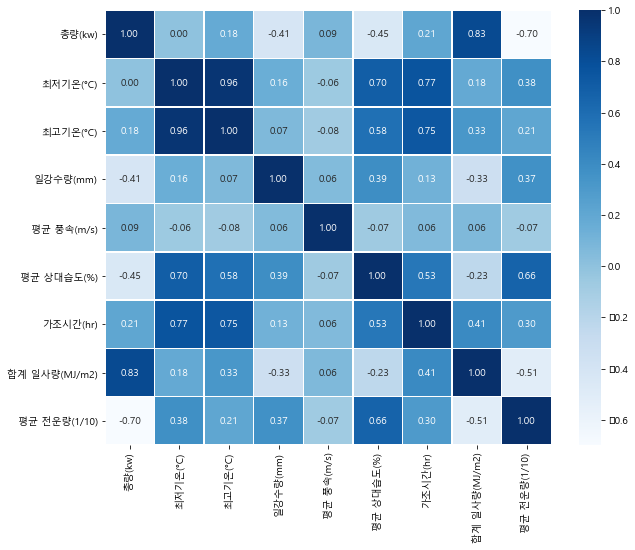

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True,
fmt='.2f', linewidths=.5, cmap='Blues')

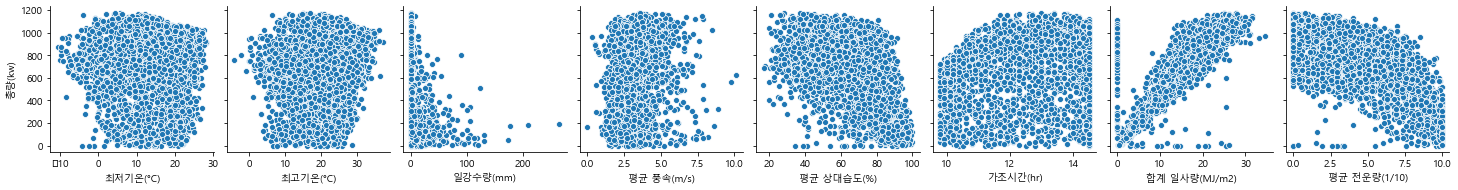

In [67]:
sns.pairplot(df, x_vars=['최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)',
       '가조시간(hr)', '합계 일사량(MJ/m2)', '평균 전운량(1/10)'],y_vars=['총량(kw)'])
#sns.pairplot(df, x_vars=['최저기온(°C)', '최고기온(°C)', '평균 풍속(m/s)', '평균 상대습도(%)',
#       '가조시간(hr)', '합계 일사량(MJ/m2)', '평균 전운량(1/10)'],y_vars=['총량(kw)'])

In [68]:
df.head()

,년월일,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
0,2013-01-01,507.36,-2.8,8.0,0.0,3.1,48.5,9.9,8.99,3.4
1,2013-01-02,625.20,-5.9,3.6,0.0,4.0,40.9,9.9,10.30,1.5
2,2013-01-03,656.88,-7.7,-1.0,0.0,3.9,26.3,9.9,10.77,2.8
3,2013-01-04,701.28,-8.1,2.8,0.0,3.7,24.6,9.9,11.36,0.3
4,2013-01-05,686.40,-3.8,3.4,0.0,3.4,26.4,9.9,11.14,0.8


### 최소자승법 OLS를 적용한 회귀분석

In [44]:
from statsmodels.formula.api import ols

In [69]:
# X = df.drop(['일시', ,'총량(kw)'], axis='columns')
X = df[['합계 일사량(MJ/m2)']]
y = df['총량(kw)']
res = ols('y ~ X', data=df).fit()

In [70]:
X.head()
X.shape
y.head()
y.shape

,합계 일사량(MJ/m2)
0,8.99
1,10.30
2,10.77
3,11.36
4,11.14


(2769, 1)

0    507.36
1    625.20
2    656.88
3    701.28
4    686.40
Name: 총량(kw), dtype: float64

(2769,)

In [71]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     6165.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:40:34   Log-Likelihood:                -18117.
No. Observations:                2769   AIC:                         3.624e+04
Df Residuals:                    2767   BIC:                         3.625e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.0118      6.820     27.566      0.000     174.638     201.385
X             33.3952      0.425     78.516      0.000      32.561      34.229
==============================================================================
Omnibus:                      704.321   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7367.167
Skew:                           0.898   Prob(JB):                         0.00
Kurtosis:                      10.786   Cond. No.                         34.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
X = df.drop(['년월일', '총량(kw)'], axis='columns')
y = df['총량(kw)']
res = ols('y ~ X', data=df).fit()

In [74]:
X.isnull().sum()

최저기온(°C)         0
최고기온(°C)         0
일강수량(mm)         0
평균 풍속(m/s)       0
평균 상대습도(%)       0
가조시간(hr)         0
합계 일사량(MJ/m2)    0
평균 전운량(1/10)     0
dtype: int64

In [75]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1721.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:40:48   Log-Likelihood:                -17261.
No. Observations:                2769   AIC:                         3.454e+04
Df Residuals:                    2760   BIC:                         3.459e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1976     32.652      0.864      0.388     -35.827      92.223
X[0]         -17.6899      1.527    -11.588      0.000     -20.683     -14.696
X[1]          21.1950      1.550     13.673      0.000      18.155      24.234
X[2]          -1.3997      0.172     -8.121      0.000      -1.738      -1.062
X[3]           7.9114      2.115      3.740      0.000       3.764      12.059
X[4]          -2.8817      0.242    -11.906      0.000      -3.356      -2.407
X[5]          40.7951      2.791     14.614      0.000      35.322      46.269
X[6]          16.9905      0.546     31.132      0.000      15.920      18.061
X[7]         -29.9148      1.213    -24.668      0.000     -32.293     -27.537
==============================================================================
Omnibus:                      948.547   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21657.144
Skew:                          -1.081   Prob(JB):                         0.00
Kurtosis:                      16.529   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""